#Task 1

Implement nonlinear Transformation functions:
<ol>
<li> Log Transformation </li>
<li> Power-law Transformation </li>
</ol>

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_image_as_np_array(filepath):
    # Open the image file
    img = Image.open(filepath)
    
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    return img_array


In [27]:
power = load_image_as_np_array('DIP3E_Original_Images_CH03\Fig0309(a)(washed_out_aerial_image).tif')


In [28]:
fourier = load_image_as_np_array('DIP3E_Original_Images_CH03\Fig0305(a)(DFT_no_log).tif')


In [22]:
def log_transform(gray_image):
  #implement this function

  c = 255/(np.log10(255+1))

  log_image = c * np.log10(gray_image+1)

  return log_image


def power_transform(gray_image, gamma):
  #implement this function

  c = 255/(255**gamma)

  power_image = c * np.power(gray_image,gamma)

  return power_image


# Task 1: Output and Analysis
Use your previously implemented functions to show the outputs of log transform and power transform on a sample image. Provide your analysis on the following topics:
<ol>
<li> Which function is suitable for which type of images? 
    <ul>Ans: Log transform is suitable for images with darker pixels. As it is seen for the fourier image, the darker pixel intensities are brightened after applying the log transform. Power law with gamma > 1.0 is suitable for the image with lighter pixels. The contrast of the brighter pixels are stretched and the washed out effect is removed.</ul> </li>

<li> Why is intensity scaling required before display?
    <ul>
    To ensure contrast ,intensity scaling is necessary. If intensity scaling is not done then the range of the pixel brightness remains within a smaller region decrreasing the contrast of the image. Scaling is done to distribute the pixels over a wider region.In the power law transformation, it is observed that the original image has an increased amount of white regions.But after applying power law with gamma>2, the brighter regions were darkened and now there existed an even distribution of white and black pixels. 
    </ul> </li>
</ol>

C:\Users\samaz\AppData\Local\Temp\ipykernel_7080\2392100560.py:6: RuntimeWarning: divide by zero encountered in log10
  log_image = c * np.log10(gray_image+1)


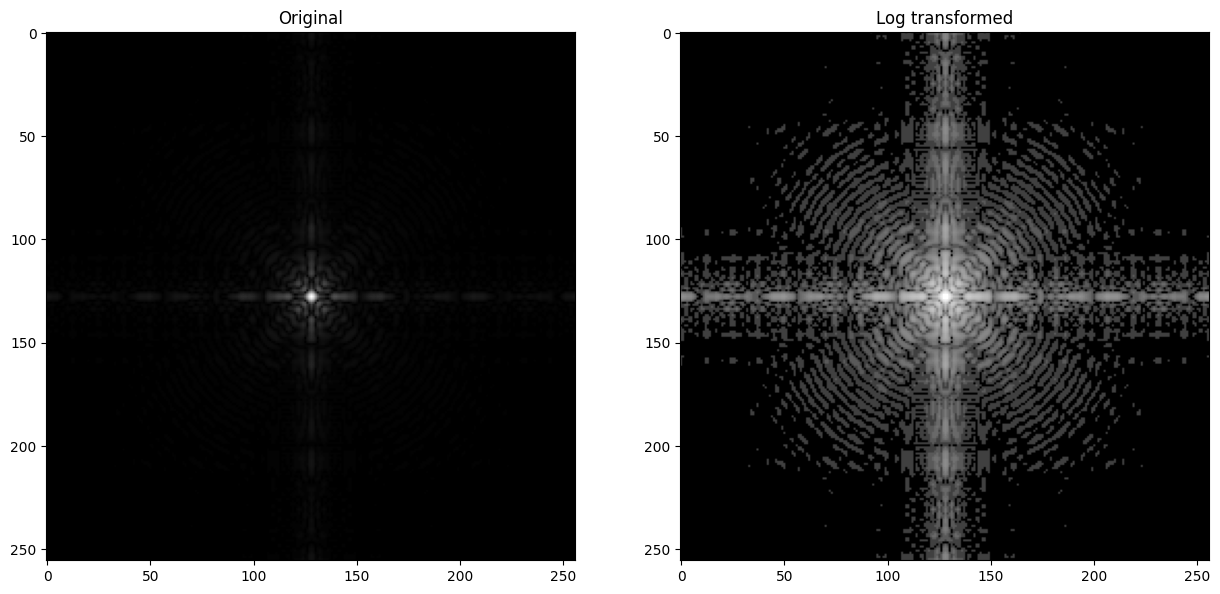

In [29]:
# Generate outputs for Task 1 here
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))

ax[0].imshow(fourier,cmap='gray',vmin=0,vmax=255)
ax[0].title.set_text('Original')
ax[1].imshow(log_transform(fourier),cmap='gray',vmin=0,vmax=255)
ax[1].title.set_text('Log transformed')
plt.show()


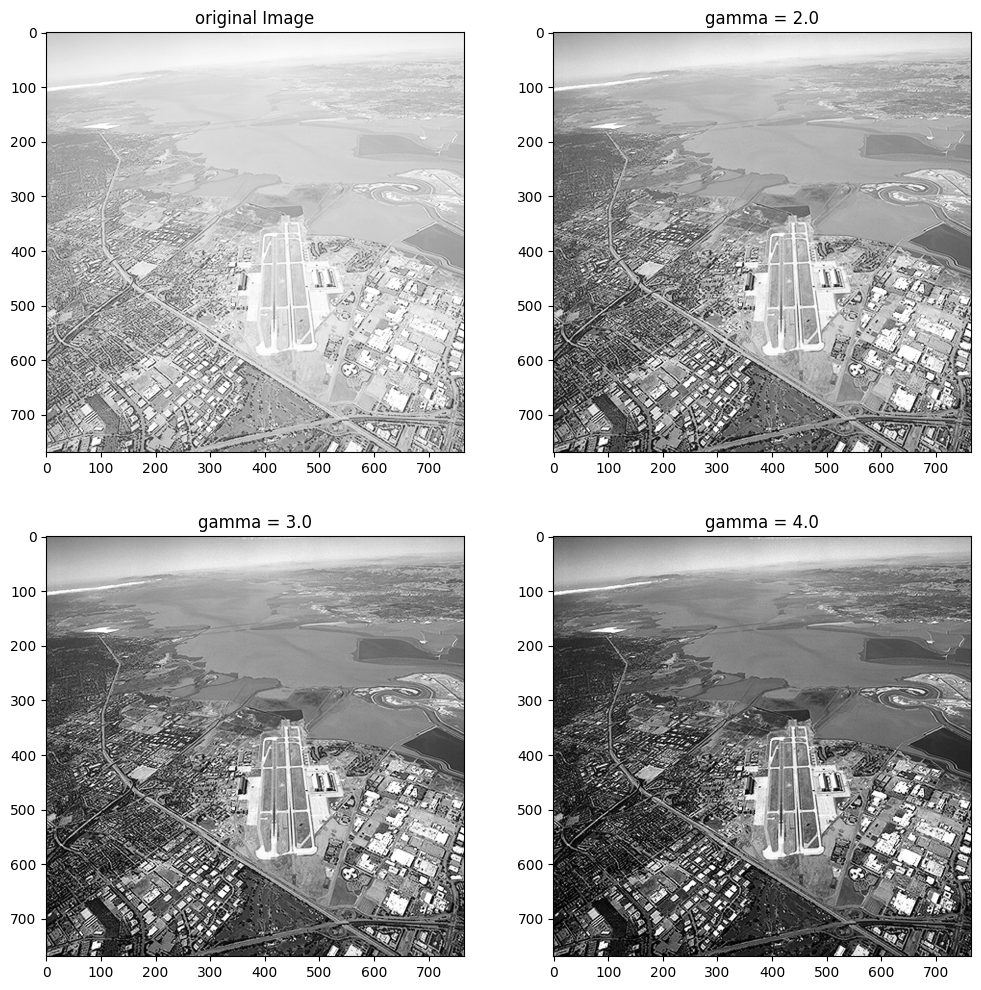

In [24]:

fig , ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
ax[0,0].imshow(power,cmap='gray',vmin=0,vmax=255)
ax[0,0].title.set_text("original Image")
ax[0,1].imshow(power_transform(power,2.0),cmap='gray',vmin=0,vmax=255)
ax[0,1].title.set_text("gamma = 2.0")
ax[1,0].imshow(power_transform(power,3.0),cmap='gray',vmin=0,vmax=255)
ax[1,0].title.set_text("gamma = 3.0")
ax[1,1].imshow(power_transform(power,4.0),cmap='gray',vmin=0,vmax=255)
ax[1,1].title.set_text("gamma = 4.0")
plt.show()

# Task 2
Implement Global Histogram Equalization on gray-scale images

In [11]:
def global_HistEqual(gray_image):
  #implement this function

  local_image=np.zeros(gray_image.shape)
  histogram , bins = np.histogram(gray_image,bins=256,range=(0,256))
  pixels = gray_image.shape[0]*gray_image.shape[1]

  pdf = histogram.copy()/pixels
  for i in range(1,len(histogram)):
    histogram[i]+=histogram[i-1]
  histogram=np.round(np.multiply(histogram,(255/pixels)))
  cdf = histogram.copy()


  for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
      local_image[i][j] = histogram[gray_image[i][j]]
  
  return local_image,pdf,cdf


# Task 2: Output and Analysis
Use your previously implemented function to show the output of global histogram equalization on a sample image.

Plot the Histogram of the equalized image.

Provide your analysis on the following topic:
<ol>
<li> Why repeated application of Histogram Equalization doesn't produce any further improvements on output images? 
<ul>
    ANS: From the cdf of the transformed image , it is observed that the cdf curve is a stepped function with the graph being very close to identity function y=x.The function is stepped due to discretization and due to abscence of pixels with particular values. But apart from that this cdf is approximated as a dicrete version of the identity function.Thus when this cdf is used as T(r) for the equalized image, the output image remains the same.
</ul>
</li>
</ol>

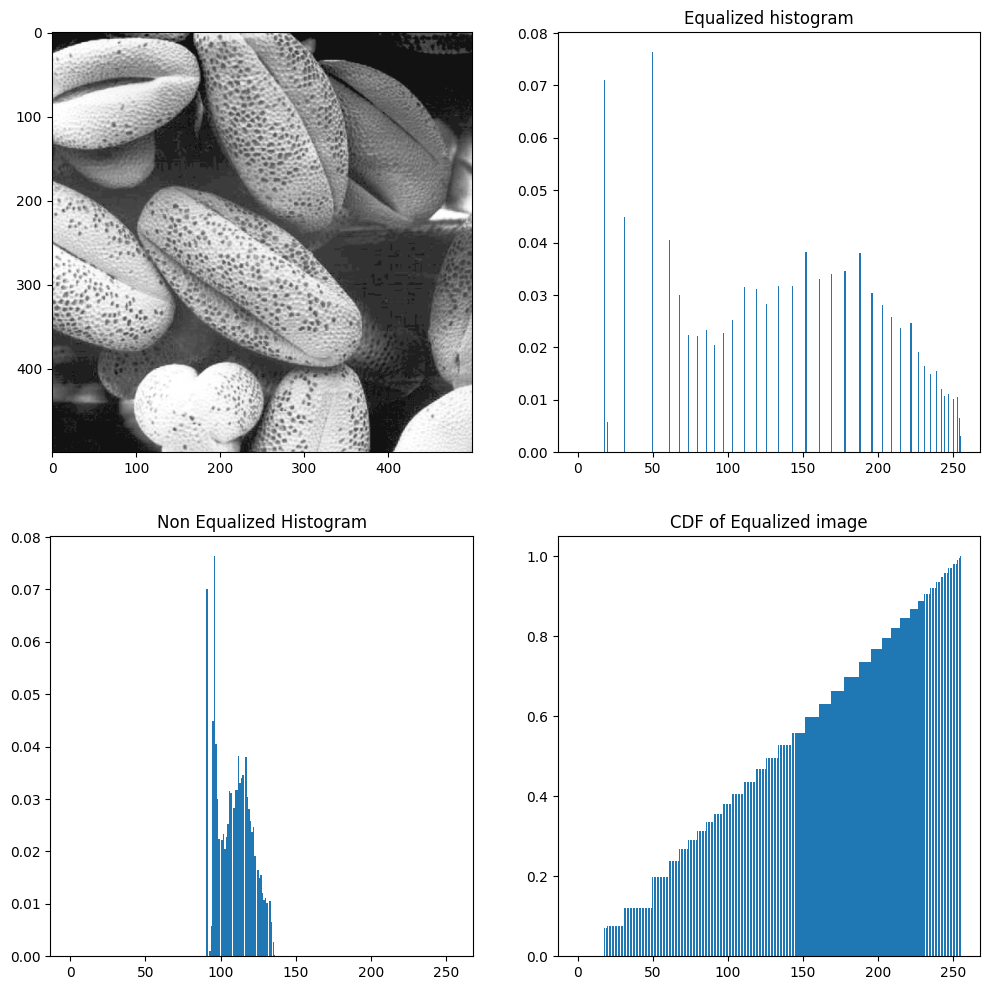

In [38]:
#Generate output for Task 2 here

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
cocoa = load_image_as_np_array('DIP3E_Original_Images_CH03\Fig0320(2)(2nd_from_top).tif')


histogram , bins = np.histogram(cocoa,bins=256,range=(0,256))
histogram=np.multiply(histogram,1/(cocoa.shape[0]*cocoa.shape[1]))

ax[1,0].bar(bins[:-1],histogram)
ax[1,0].title.set_text("Non Equalized Histogram")

glob_img,cdf,pdf = global_HistEqual(cocoa)

ax[0,0].imshow(glob_img,cmap='gray',vmin=0,vmax=255)

histogram , bins = np.histogram(glob_img,bins=256,range=(0,256))
histogram=np.multiply(histogram,1/(glob_img.shape[0]*glob_img.shape[1]))
ax[0,1].bar(bins[:-1],histogram)
ax[0,1].title.set_text("Equalized histogram")

histogram = np.cumsum(histogram)
ax[1,1].bar(bins[:-1],histogram)
ax[1,1].title.set_text("CDF of Equalized image")

plt.show()

# Task 3

Implement Local Histogram Equalization (LHE) on gray scale images.


In [3]:
def hist_equal_subarr(gray_image,size,i,j):

    local_image=np.zeros(gray_image.shape)
    gray_image = gray_image[i:i+size,j:j+size]

    histogram , bins = np.histogram(gray_image,bins=256,range=(0,256))
    pixels = gray_image.shape[0]*gray_image.shape[1]

    for i in range(1,len(histogram)):
        histogram[i]+=histogram[i-1]

    histogram=np.round(np.multiply(histogram,(255/pixels)))

    for i in range(gray_image.shape[0]):
        for j in range(gray_image.shape[1]):
            gray_image[i][j] = histogram[gray_image[i][j]]
            # local_image[i][j] = np.clip(local_image[i][j],a_min=0,a_max=255)

    return gray_image
    

In [4]:
def local_HistEqual(gray_image, size,stride):
  #implement this function

  local_image = np.zeros(gray_image.shape)
  for i in range(0,gray_image.shape[0]-size+1,stride):
      for j in range(0,gray_image.shape[1]-size+1,stride):
         local_image[i:i+size,j:j+size]=hist_equal_subarr(gray_image,size,i,j)


  return local_image

# Task 3: Output and Analysis
Use your previously implemented function to show the output of local histogram equalization on a sample image. Provide your analysis on the following topic:
<ol>
<li> Why do you have annoying side effects at the boundary of local image regions? 
<ul>
ANS: Due to the effect of stride, the overlapping LHE is not able to engulf the boundary region fully and skips to the next region.Thus dark artifacts are visible within the boundary regions.Also if stride is not equal to blocksize , then the regions where the images overlap show artifacts.
</ul></li>
<li> What is the effect of changing the stride? 
<ul>
ANS: If stride is equal to the blocksize, then blocky effects are visible as we are performing NON overlapping LHE.If the stride is not equal, then the blocky effect is less .If stride is lower than blocksize then in the overlappig regions at the edges of the blocks artifacts are visible.If the image width or height is divisible by the stride and blocksize, then no artifacts are visible(though blocky effect persists) as the blocks are perfectly aligned within the grid. 
</ul></li>
</ol>

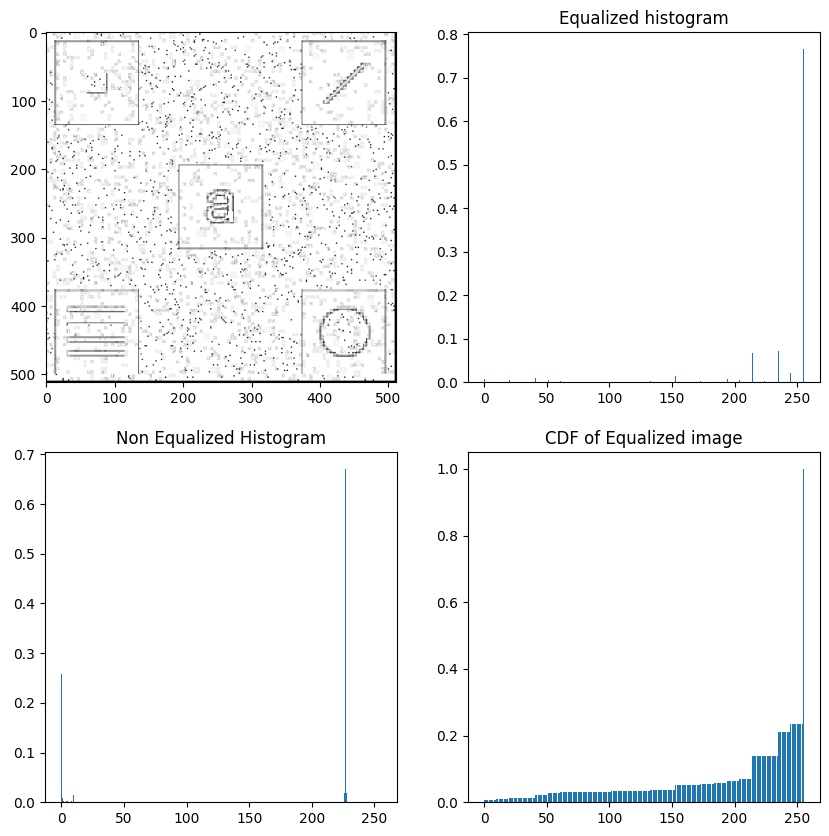

In [37]:

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
cocoa = load_image_as_np_array('DIP3E_Original_Images_CH03\Fig0326(a)(embedded_square_noisy_512).tif')

histogram , bins = np.histogram(cocoa,bins=256,range=(0,256))
histogram=np.multiply(histogram,1/(cocoa.shape[0]*cocoa.shape[1]))

ax[1,0].bar(bins[:-1],histogram)
ax[1,0].title.set_text("Non Equalized Histogram")

glob_img = local_HistEqual(cocoa,5,5)

ax[0,0].imshow(glob_img,cmap='gray',vmin=0,vmax=255)

histogram , bins = np.histogram(glob_img,bins=256,range=(0,256))
histogram=np.multiply(histogram,1/(glob_img.shape[0]*glob_img.shape[1]))
ax[0,1].bar(bins[:-1],histogram)
ax[0,1].title.set_text("Equalized histogram")

histogram = np.cumsum(histogram)
ax[1,1].bar(bins[:-1],histogram)
ax[1,1].title.set_text("CDF of Equalized image")

plt.show()